In [1]:
import os
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import ubyte
import idx2numpy

from torchvision.io import read_image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda
from torch import nn


In [2]:
# This is the code to convert a ubyte data to images and labels to a directory

# # ubyte.decode_idx3_ubyte("/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte")
# import os
# import numpy as np
# from PIL import Image

# def ubyte_to_images(ubyte_file, label_file, output_folder, image_size=(28, 28)):
#     """
#     Convert ubyte image data to individual image files.
    
#     Args:
#         ubyte_file (str): Path to the .ubyte file containing images.
#         label_file (str): Path to the .ubyte file containing labels.
#         output_folder (str): Directory to save the extracted images.
#         image_size (tuple): The size of each image (e.g., (28, 28) for MNIST).
#     """
#     # Create output folder if it doesn't exist
#     os.makedirs(output_folder, exist_ok=True)

#     # Read image data
#     with open(ubyte_file, 'rb') as img_file:
#         img_file.read(16)  # Skip the header
#         images = np.frombuffer(img_file.read(), dtype=np.uint8)
#         images = images.reshape(-1, *image_size)

#     # Read label data
#     with open(label_file, 'rb') as lbl_file:
#         lbl_file.read(8)  # Skip the header
#         labels = np.frombuffer(lbl_file.read(), dtype=np.uint8)

#     # Save images to the output folder
#     for idx, (image, label) in enumerate(zip(images, labels)):
#         # Create label folder
#         label_folder = os.path.join(output_folder, str(label))
#         os.makedirs(label_folder, exist_ok=True)

#         # Save image as PNG
#         img = Image.fromarray(image)
#         img.save(os.path.join(label_folder, f"{idx}.png"))

#     print(f"Images successfully saved to {output_folder}")

# # Example usage
# ubyte_file_path = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte'  # Replace with your .ubyte image file
# label_file_path = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte'  # Replace with your .ubyte label file
# output_directory = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/data_train'          # Replace with your desired output folder

# ubyte_to_images(ubyte_file_path, label_file_path, output_directory)

# ubyte_file_path = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte'  # Replace with your .ubyte image file
# label_file_path = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte'  # Replace with your .ubyte label file
# output_directory = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/data_test'          # Replace with your desired output folder

# ubyte_to_images(ubyte_file_path, label_file_path, output_directory)


In [3]:
num_classes = 10

In [4]:
# # This is the way to download dataset from prebuilt datasets of pytorch

# train_data = datasets.FashionMNIST(
#     root="/home/abhinav/Documents/Work/2 Hobby_projects/AIProjects/Pytorch/Data/FashionMNIST/raw/train-images-idx3-ubyte",
#     train=True,
#     download=False,
#     transform=ToTensor(),
#     target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
# )

# test_data = datasets.FashionMNIST(
#     root="Data/FashionMNIST",
#     train=False,
#     download=False,
#     transform=ToTensor()
# )

In [5]:
# class CustomImageDataset(Dataset):
#     def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#         self.img_labels = pd.read_csv(annotations_file)
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.img_labels)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         image = read_image(img_path)
#         label = self.img_labels.iloc[idx, 1]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label

In [6]:
# train_data = CustomImageDataset("/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte", 
#                                 "/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte", 
#                                 ToTensor(),
#                                 Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
#                                 )

# test_data = CustomImageDataset("/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte", 
#                                 "/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte", 
#                                 ToTensor(),
#                                 Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
#                                 )

In [7]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [8]:
train_dataset_dir = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/data_train'
test_dataset_dir = '/home/abhinav/Documents/Work/2 Hobby_projects/Datasets/FashionMNIST/FashionMNIST/data_test'

transform = transforms.Compose([
    # transforms.Resize((128, 128)),  # Resize images to 128x128 (change as needed)
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images (adjust mean/std as needed)
])

target_transform = Lambda(lambda y: torch.zeros(num_classes, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))

train_data = datasets.ImageFolder(root=train_dataset_dir, transform=transform, target_transform=target_transform)
test_data = datasets.ImageFolder(root=test_dataset_dir, transform=transform, target_transform=target_transform)

In [9]:
# print("len of train data: ", len(set(train_data)))
# print("len of first unit of train data: ", len(train_data[0]))
# print("The first part is image, and the second part is label")

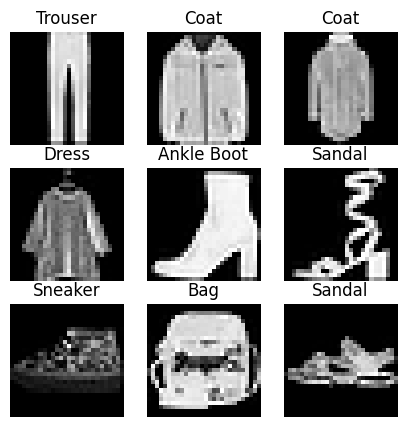

In [10]:
figure = plt.figure(figsize=(5, 5))

cols, rows = 3, 3

for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(train_data), size=(1, )).item()
    img, label = train_data[sample_idx]
    img = img[0]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[torch.argmax(label).item()])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="grey")
plt.show()


In [11]:
# Preparing data for training using DataLoaders

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


First method:
Batch of Images: torch.Size([64, 3, 28, 28])
Batch of Labels: 64
Second method:
size of train_features:  64
size of labels:  64
shape of img:  torch.Size([28, 28])
label:  0


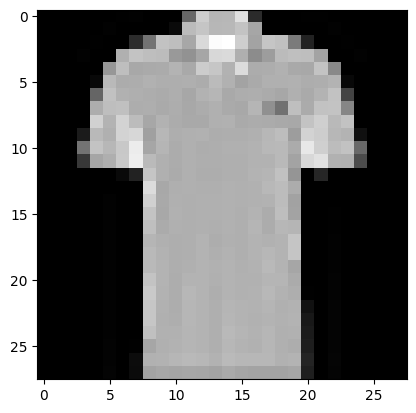

In [12]:
# First way of iterating

print("First method:")
for images, labels in train_dataloader:
    print(f"Batch of Images: {images.shape}")  # (batch_size, channels, height, width)
    print(f"Batch of Labels: {len(labels)}")       # Corresponding labels

    # for i in range(len(images)):
    #     print("image: ", images[i].shape)
    #     print("label: ", labels[i])
    break

# Second way of iterating

print("Second method:")
train_features, train_labels = next(iter(train_dataloader))
print("size of train_features: ", len(train_features))
print("size of labels: ", len(train_labels))
print("shape of img: ", img.shape)
img = torch.mean(train_features[0].squeeze(), dim=0)
label = train_labels[0]
print("label: ", torch.argmax(label).item())
plt.imshow(img, cmap="grey")
plt.show()

In [13]:
# Learn the reason why this creates an error

# train_features, train_labels = next(iter(train_dataloader))
# print("size of train_features: ", len(train_features))
# print("size of labels: ", len(train_labels))

# img = train_features[0].squeeze()
# label = train_labels[0]
# print("label: ", labels_map[label])
# plt.imshow(img, cmap="grey")
# plt.show()

In [14]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.mps.is_available()
    else "cpu"
)

print(f"We are using {device} as device")

We are using cuda as device


In [15]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # self.conv1 = nn.Sequential(
        #     nn.Conv2d(in_channels=1,  # Input channels (e.g., RGB color)
        #               out_channels=8,  # Number of filters in this layer
        #               kernel_size=3,    # Size of each filter (3x3)
        #               stride=1,         # Stride (movement) of the filter
        #               padding=1),       # Padding to maintain the input size
        #     nn.ReLU())  # Activation function (Rectified Linear Unit)

        # # Convolutional Layer 2: Input (32 channels, 50x50 pixels)
        # self.conv2 = nn.Sequential(
        #     nn.Conv2d(in_channels=8,  # Input channels from previous layer(out_channels)
        #               out_channels=16,  
        #               kernel_size=3,     
        #               stride=1,          
        #               padding=1),        
        #     nn.ReLU())
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    def forward(self, x):
        # x = self.conv1(x)
        # x = self.conv2(x)
        # print("shape of input recieved: ", x.shape)
        x = self.flatten(x)
        # print("shape of input after flatten operation: ", x.shape)
        logits = self.linear_relu_stack(x)
        # print("output of the model: ", logits)
        return logits

model = NeuralNetwork().to(device=device)
print("Model: ", model)

for name, parameters in model.named_parameters():
    print(f"Layer: {name}, parameter size: {parameters.size()}")
    if len(np.array(parameters.size())) == 2:
        p = np.array(parameters.size())
        print("The previous layer has ", p[1], " neurons and the current layer has ", p[0], " neurons")
        print("For each neuron of previous layer, for each neuron of current layer, weights will be assigned")

for param in model.parameters():
    param.requires_grad_(True)

Model:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
)
Layer: linear_relu_stack.0.weight, parameter size: torch.Size([512, 784])
The previous layer has  784  neurons and the current layer has  512  neurons
For each neuron of previous layer, for each neuron of current layer, weights will be assigned
Layer: linear_relu_stack.0.bias, parameter size: torch.Size([512])
Layer: linear_relu_stack.2.weight, parameter size: torch.Size([256, 512])
The previous layer has  512  neurons and the current layer has  256  neurons
For each neuron of previous layer, for each neuron of current layer, weights will be assigned
Layer: linear_relu_stack.2.bias, paramet

In [16]:
# # Running a random input

# X = torch.rand(1, 28, 28, device=device)
# print(X.shape)
# logits = model(X)
# prediction = nn.Softmax(dim=1)(logits)
# print("prediction: ", prediction)
# ypred = prediction.argmax(1)
# print("final prediction: ", ypred)

In [17]:
epochs = 5
batch_size = 64
learning_rate = 1e-3

In [18]:
# def train_loop(dataloader, model, loss_fn, optimizer):
#     size = len(dataloader.dataset)
#     # Set the model to training mode - important for batch normalization and dropout layers
#     # Unnecessary in this situation but added for best practices
#     model.train()
#     for batch, (img, lab) in enumerate(dataloader):
#         # Compute prediction and loss
#         for X, y in zip(img, lab):
#             print("X shape: ", X.shape)
#             X = torch.mean(X, dim=0, keepdim=True)
#             print("X shape: ", X.shape)
#             pred = model(X.cuda())
#             print("prediction: ", pred)
#             print("target: ", y)
#             # print("return cel: ", nn.CrossEntropyLoss(pred, y))
#             loss = loss_fn(pred, y)

#             # Backpropagation
#             loss.backward()
#             optimizer.step()
#             optimizer.zero_grad()

#         if batch % 100 == 0:
#             loss, current = loss.item(), batch * batch_size + len(X)
#             print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


# def test_loop(dataloader, model, loss_fn):
#     # Set the model to evaluation mode - important for batch normalization and dropout layers
#     # Unnecessary in this situation but added for best practices
#     model.eval()
#     size = len(dataloader.dataset)
#     num_batches = len(dataloader)
#     test_loss, correct = 0, 0

#     # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
#     # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
#     with torch.no_grad():
#         for X, y in dataloader:
#             pred = model(X)
#             test_loss += loss_fn(pred, y).item()
#             correct += (pred.argmax(1) == y).type(torch.float).sum().item()

#     test_loss /= num_batches
#     correct /= size
#     print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [19]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    print("model device: ", next(model.parameters()).device)
    print("model requires_grad: ")
    for param in model.parameters():
        print("sdf: ", param.requires_grad)
    model.train()
    for batch, (img, lab) in enumerate(dataloader):
        # print("shape of (X, y): ", img.shape, lab.shape)
        # print("batch: ", batch)
        # print("len(X): ", len(img))
        # Compute prediction and loss
        for X, y in zip(img, lab):
            # print("X: ", X.shape)
            X = torch.mean(X, dim=0, keepdim=True)
            # print("X: ", X.shape)
            # print("y: ", y.shape)
            # X = torch.argmax(X, dim=1)
            # print("X after argmax: ", X)
            # print("num_classes: ", num_classes)
            # X = torch.nn.functional.one_hot(X, num_classes=num_classes).to(torch.float)
            y = y.to(torch.float)
            X = X.unsqueeze(0)
            pred = model(X.cuda())
            # print("Should print true eeee: ", pred.requires_grad)
            pred = torch.argmax(pred, dim=1)
            pred = torch.nn.functional.one_hot(pred, num_classes=num_classes).to(torch.float).squeeze()
            # print("flatten weights: ", model.flatten.weight)
            # print("pred: ", pred)
            # print("y: ", y)
            y = y.to(device)
            loss = loss_fn(pred, y)
            loss.requires_grad_(True)
            # print("Should print true eeee: ", pred.requires_grad)
            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



In [20]:

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for img, lab in dataloader:
            for Xx, Yy in zip(img, lab):
                # print("X.shape: ", Xx.shape)
                Xx = torch.mean(Xx, dim=0, keepdim=True)
                # print("X.shape: ", Xx.shape)
                Xx = Xx.to(device=device)
                Xx = Xx.unsqueeze(0)
                # print("X is in device: ", Xx.get_device())
                # print("Model device:", next(model.parameters()).device)

                # print("model is in device: ", model.get_device())
                pred = model(Xx)
                pred = torch.argmax(pred, dim=1)
                pred = torch.nn.functional.one_hot(pred, num_classes=num_classes).to(torch.float).squeeze()
                Yy = Yy.to(device=device)
                test_loss += loss_fn(pred, Yy).item()
                correct += (pred.argmax(0) == Yy).type(torch.float).sum().item()

                test_loss /= num_batches
                correct /= size
    print(f"Test Error: \n Accuracy: {(correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [21]:
a = torch.tensor([[ 0.0676, -0.0373,  0.1026,  0.0148, -0.0327, -0.0605, -0.0809, -0.0432, 0.0517,  0.2429]])
b = torch.tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

a = torch.argmax(a, dim=1)
num_class = 10

a = torch.nn.functional.one_hot(a, num_classes=num_class).to(torch.float)
b = b.to(torch.float)

l = nn.CrossEntropyLoss()
l(a, b)
print(l)

CrossEntropyLoss()


In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
model device:  cuda:0
model requires_grad: 
sdf:  True
sdf:  True
sdf:  True
sdf:  True
sdf:  True
sdf:  True
sdf:  True
sdf:  True
loss: 2.461150  [    1/60000]
loss: 1.461150  [ 6401/60000]
loss: 2.461150  [12801/60000]
loss: 2.461150  [19201/60000]


KeyboardInterrupt: 

In [ ]:
# # Example of target with class indices
# loss = nn.CrossEntropyLoss()

# # Example of target with class probabilities
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.randn(3, 5).softmax(dim=1)
# print("input shape: ", input.shape)
# print("target shape: ", target.shape)
# print("input :", input)
# print("target: ", target)
# output = loss(input, target)
# output.backward()